In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tf_keras.preprocessing.text import Tokenizer
from tf_keras.preprocessing import sequence
from keras.api.models import Sequential
from keras.api.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
from VNP.packages.vnp_ez import  *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv("../data/emotions-dataset.csv")
df

,message,emotion
0,i used to be able to hang around talk with the...,anger
1,i get made to feel left out and unimportant in...,sadness
2,i wasnt going to post today as i am feeling qu...,sadness
3,i feel extremely delicate and a bit helpless,love
4,i feel frightened that i might fail to notice ...,fear
...,...,...
11995,i feel useless for wasting k hours k just for ...,sadness
11996,i feel rushed and pulled and rung out and i kn...,anger
11997,i feel absolutely disgusted,anger
11998,i know that we are all sinners and fall short ...,sadness


Check if the dataset is balanced.

<Axes: xlabel='emotion'>

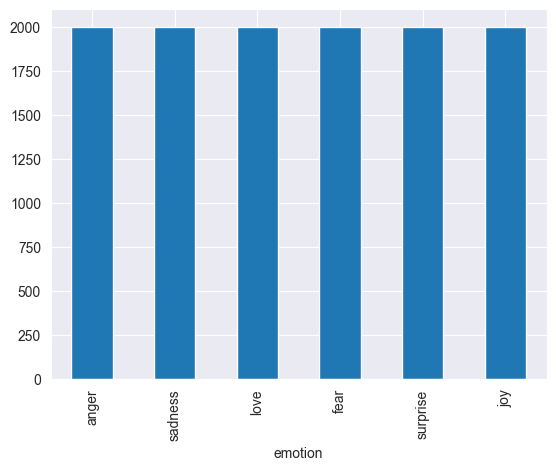

In [13]:
df["emotion"].value_counts().plot.bar()

Check if there are missing values.

In [14]:
df.isnull().sum()

message    0
emotion    0
dtype: int64

Plot the distribution of words per text.

<Axes: ylabel='Frequency'>

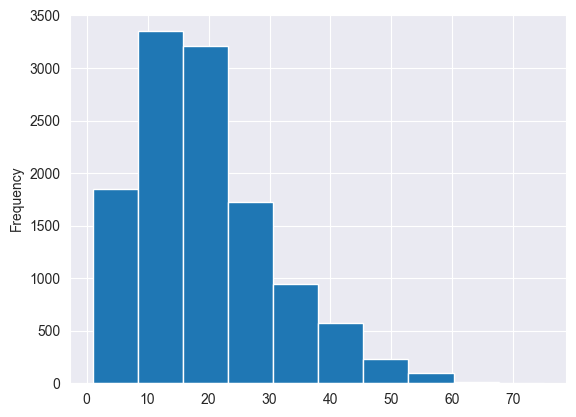

In [16]:
df["message"].str.split().apply(len).plot.hist()

<Axes: >

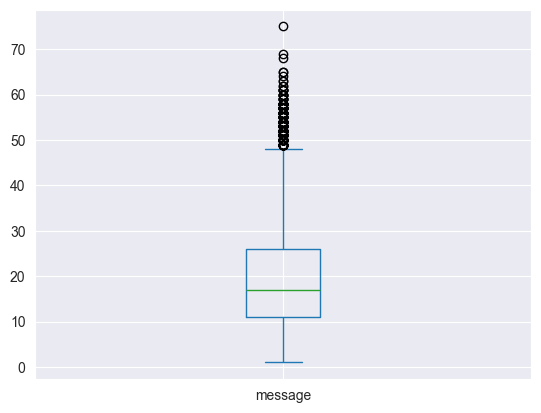

In [77]:
df["message"].str.split().apply(len).plot.box()

In [18]:
outliers_limit = 45

In [79]:
df_1 = df[df["message"].str.split().apply(len) < 45].copy()

<Axes: >

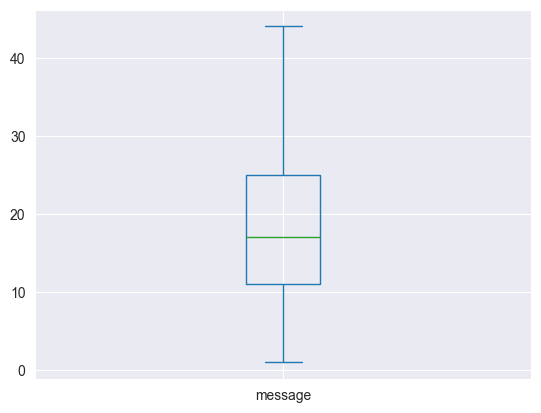

In [78]:
df_1["message"].str.split().apply(len).plot.box()

<Axes: ylabel='Frequency'>

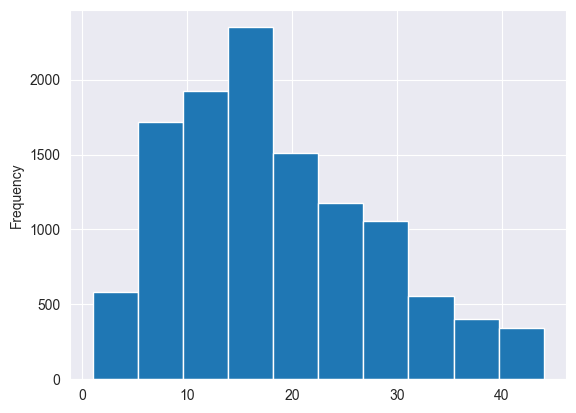

In [21]:
df_1["message"].str.split().apply(len).plot.hist()

In [22]:
def get_vocabulary(texts: list[str]) -> list[str]:
    vocabulary = set()
    for text in texts:
        for word in text.split(" "):
            vocabulary.add(word)
    return list(vocabulary)

In [24]:
vocabulary = get_vocabulary(df_1["message"].tolist())

In [26]:
vocabulary_len = len(vocabulary)
vocabulary_len

12665

In [27]:
max_vocabulary_size = 10000

In [46]:
X, Y = df_1["message"], pd.get_dummies(df_1["emotion"])

In [48]:
X

0        i used to be able to hang around talk with the...
1        i get made to feel left out and unimportant in...
3             i feel extremely delicate and a bit helpless
4        i feel frightened that i might fail to notice ...
5        i feel stubborn because i just want my seattle...
                               ...                        
11995    i feel useless for wasting k hours k just for ...
11996    i feel rushed and pulled and rung out and i kn...
11997                          i feel absolutely disgusted
11998    i know that we are all sinners and fall short ...
11999    i guess i just feel aggravated that i cant get...
Name: message, Length: 11607, dtype: object

In [49]:
Y

,anger,fear,joy,love,sadness,surprise
0,True,False,False,False,False,False
1,False,False,False,False,True,False
3,False,False,False,True,False,False
4,False,True,False,False,False,False
5,True,False,False,False,False,False
...,...,...,...,...,...,...
11995,False,False,False,False,True,False
11996,True,False,False,False,False,False
11997,True,False,False,False,False,False
11998,False,False,False,False,True,False


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
tokenizer = Tokenizer(num_words=max_vocabulary_size)
tokenizer.fit_on_texts(x_train.values)

In [52]:
x_train_embedings = tokenizer.texts_to_sequences(x_train)
x_test_embedings = tokenizer.texts_to_sequences(x_test)

In [54]:
x_train_embedings

[[1,
  161,
  28,
  54,
  23,
  35,
  5,
  94,
  45,
  2029,
  3,
  644,
  3,
  463,
  1,
  232,
  4,
  2,
  136,
  13,
  3590],
 [1, 18, 40, 7, 25, 9, 571],
 [1,
  516,
  328,
  464,
  66,
  1177,
  22,
  2801,
  3,
  5,
  56,
  9,
  176,
  1114,
  88,
  2801,
  66,
  2,
  39,
  464,
  30,
  1,
  17,
  26,
  184,
  4,
  70,
  1828],
 [1,
  97,
  13,
  6,
  40,
  465,
  45,
  680,
  19,
  112,
  1,
  319,
  75,
  91,
  1044,
  101,
  68,
  1178,
  51,
  77],
 [1, 2, 22, 244, 1, 63, 25, 89, 13, 5115],
 [16,
  5116,
  7,
  350,
  1,
  103,
  81,
  6,
  196,
  65,
  31,
  3,
  1,
  1659,
  1531,
  126,
  191,
  57,
  645,
  9,
  1179,
  31,
  80,
  72,
  42,
  645,
  9,
  3,
  358,
  147,
  1,
  80,
  76],
 [1,
  66,
  26,
  1177,
  71,
  30,
  10,
  914,
  1115,
  61,
  499,
  57,
  4,
  94,
  20,
  2,
  9,
  381,
  128],
 [1,
  32,
  120,
  681,
  9,
  1829,
  2319,
  7,
  8,
  1532,
  3591,
  14,
  16,
  617,
  1,
  55,
  5,
  5117,
  2802,
  29,
  5,
  2803,
  4,
  249,
  5,
  1533,
 

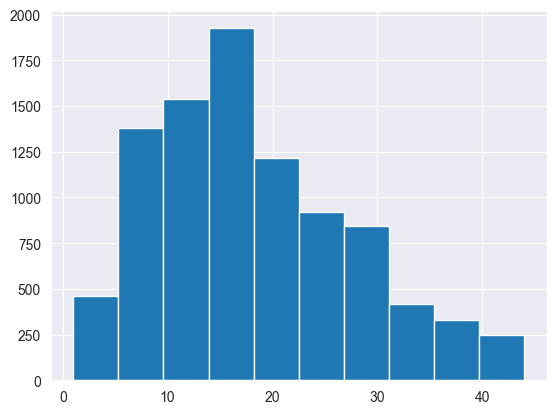

In [56]:
plt.hist([len(tokens) for tokens in x_train_embedings]);

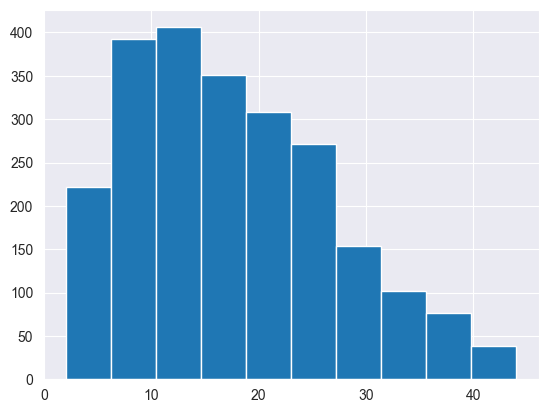

In [57]:
plt.hist([len(tokens) for tokens in x_test_embedings]);

In [62]:
num_classes = len(df_1["emotion"].unique())
num_classes

6

In [58]:
max_word_len = 32

In [59]:
x_train_embedings_padded = sequence.pad_sequences(x_train_embedings, maxlen=max_word_len)
x_test_embedings_padded = sequence.pad_sequences(x_test_embedings, maxlen=max_word_len)

In [63]:
model = Sequential([
    Embedding(input_dim=max_vocabulary_size, output_dim=128),
    Conv1D(filters=32, kernel_size=4, padding="same", activation="relu"),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=4, padding="same", activation="relu"),
    MaxPooling1D(pool_size=2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(64, dropout=0.1, recurrent_dropout=0.1),
    Dense(num_classes, activation="softmax")
])

In [64]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["precision", "recall", "f1_score"]
)

In [65]:
history = model.fit(x_train_embedings_padded, y_train, validation_split=0.2, batch_size=64, epochs=3)

Epoch 1/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - f1_score: 0.1657 - loss: 1.7699 - precision: 0.2862 - recall: 0.0065 - val_f1_score: 0.4450 - val_loss: 1.2389 - val_precision: 0.8793 - val_recall: 0.2079
Epoch 2/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1_score: 0.5954 - loss: 0.9662 - precision: 0.7698 - recall: 0.4005 - val_f1_score: 0.8029 - val_loss: 0.6321 - val_precision: 0.8421 - val_recall: 0.7695
Epoch 3/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1_score: 0.8066 - loss: 0.5597 - precision: 0.8262 - recall: 0.7868 - val_f1_score: 0.8148 - val_loss: 0.5628 - val_precision: 0.8266 - val_recall: 0.8034


In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 32, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 32, 32)         │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,359,860 (16.63 MB)

 Trainable params: 1,453,286 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,906,574 (11.09 MB)

<Axes: >

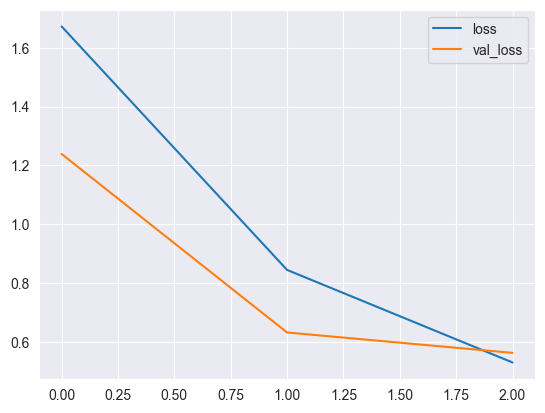

In [67]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [72]:
preds = model.predict(x_test_embedings_padded)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [73]:
preds

array([[1.10505395e-01, 2.81966507e-01, 4.67320204e-01, 2.05639116e-02,
        7.89613053e-02, 4.06827293e-02],
       [2.80332891e-03, 6.86416253e-02, 8.84174824e-01, 3.87047976e-02,
        4.96804155e-03, 7.07312778e-04],
       [2.39438005e-03, 7.46838033e-01, 2.19763994e-01, 2.52417568e-03,
        2.79853996e-02, 4.94064006e-04],
       ...,
       [7.29760388e-03, 7.30061471e-01, 1.66404858e-01, 3.40315467e-03,
        9.17439535e-02, 1.08891295e-03],
       [5.04297763e-03, 3.39921921e-01, 6.22475564e-01, 1.07894372e-02,
        2.07022019e-02, 1.06797402e-03],
       [4.49419441e-03, 4.34672832e-02, 4.17757174e-03, 2.32083476e-04,
        6.19026693e-03, 9.41438556e-01]], dtype=float32)

In [74]:
test_y_arg = y_test.values.argmax(axis=1)
preds_arg = preds.argmax(axis=1)

In [75]:
print(classification_report(test_y_arg, preds_arg))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       392
           1       0.69      0.72      0.70       365
           2       0.72      0.68      0.70       368
           3       0.91      0.87      0.89       398
           4       0.76      0.78      0.77       423
           5       0.87      0.98      0.92       376

    accuracy                           0.81      2322
   macro avg       0.81      0.81      0.81      2322
weighted avg       0.81      0.81      0.81      2322



Text(0.5, 1.0, 'Confusion Matrix')

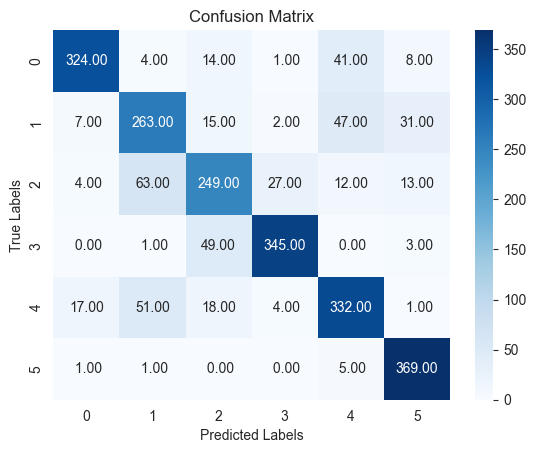

In [76]:
sns.heatmap(confusion_matrix(test_y_arg, preds_arg), annot=True, fmt="5.2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")